### Objective
Our project objective is to analyze how public tweets influence the prices of stocks. Specifically stocks for Bitcoin and Dogecoin, two cryptocurrencies, that have been very popular in the news this year. Our goal is to use sentiment analysis technology to analyze news and mentions of Bitcoin and Dogecoin on Twitter. We'll also fit a random forest algorithm to the stock prices data to create a predictive model. We will also fit a deep neural network model to the data and compare the performance of both models to determine which has sufficient predictive power.

### Problem
Have you ever wondered how much an effect your tweets can have on a cryptocurrency price?

### Solution
To provide insight over how the news and tweets, prior to any major spikes or declines, affected the 2 cryptocurrencies we are examining. 

In [1]:
# Install Libraries
#!pip install textblob
#!pip install tweepy

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import tweepy
import datetime
from pprint import pprint
import json

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Authentication using keys obtained from Twitter Developer Account
consumerKey = 'mZubbqbPgNCd0rUGY3DRfYdPA'
consumerSecret = 'wlVMQRdoO7KJlzDV4bHPcia2Jbwp6Q7MfVbj5jjbeGaiugvKwI'
accessToken = '492588059-0ZsRbrHjPvGK8iQkzNgs3sdAOJIFgWW0ps6XAa3A'
accessTokenSecret = 'yai3c95PHHUB8VhoRwejW58ph4AFjLZ6kxbe8RlVxI7KA'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
username = "Bitcoin"
startDate = datetime.datetime(2021, 1, 1, 0, 0, 0)
endDate =   datetime.datetime(2021, 9, 1, 0, 0, 0)

tweets = []
tmpTweets = api.user_timeline(username)
for tweet in tmpTweets:
    if tweet.created_at < endDate and tweet.created_at > startDate:
        tweets.append(tweet)

while (tmpTweets[-1].created_at > startDate):
    print("Last Tweet @", tmpTweets[-1].created_at, "...fetching more")
    tmpTweets = api.user_timeline(username, max_id = tmpTweets[-1].id)
    for tweet in tmpTweets:
        if tweet.created_at < endDate and tweet.created_at > startDate:
            tweets.append(tweet)

today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

Last Tweet @ 2021-08-23 20:17:31 ...fetching more
Last Tweet @ 2021-08-10 04:19:46 ...fetching more
Last Tweet @ 2021-07-28 18:04:43 ...fetching more
Last Tweet @ 2021-07-19 15:20:12 ...fetching more
Last Tweet @ 2021-07-08 13:44:06 ...fetching more
Last Tweet @ 2021-06-10 14:37:42 ...fetching more
Last Tweet @ 2021-06-03 17:36:50 ...fetching more
Last Tweet @ 2021-05-27 14:04:08 ...fetching more
Last Tweet @ 2021-04-30 16:53:09 ...fetching more
Last Tweet @ 2021-04-22 03:46:44 ...fetching more
Last Tweet @ 2021-04-13 15:46:29 ...fetching more
Last Tweet @ 2021-04-08 03:30:40 ...fetching more
Last Tweet @ 2021-03-17 16:54:29 ...fetching more
Last Tweet @ 2021-02-25 11:02:06 ...fetching more
Last Tweet @ 2021-02-20 00:47:34 ...fetching more
Last Tweet @ 2021-02-16 19:23:26 ...fetching more
Last Tweet @ 2021-02-05 18:51:39 ...fetching more
Last Tweet @ 2021-02-01 17:00:42 ...fetching more
Last Tweet @ 2021-01-27 21:00:30 ...fetching more
Last Tweet @ 2021-01-21 06:21:57 ...fetching more


In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets_list = tweepy.Cursor(api.search, q="#Bitcoin since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='en').items(1000)
tweet_data=tweets_list
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  bitcoin
Please enter how many tweets to analyze:  1000


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  478
positive number:  149
negative number:  56
neutral number:  273


In [7]:
tweet_data_df=pd.DataFrame(columns=['created_at','full_text'])
#for tweet in tweet_data:
    #df=pd.DataFrame.from_dict(tweet._json)
   # tweet_data_df.append(df)
for tweet in tweet_data:
    tweet_data_df=tweet_data_df.append({'created_at':tweet._json['created_at'],'full_text':tweet._json['full_text']},ignore_index=True)
tweet_data_df

,created_at,full_text
0,Mon Sep 13 23:59:59 +0000 2021,RT @KayP1337: Are you looking for mindblowing ...
1,Mon Sep 13 23:59:58 +0000 2021,RT @floreathaiku: We had an awesome experience...
2,Mon Sep 13 23:59:57 +0000 2021,RT @michael_saylor: Slow and steady wins the r...
3,Mon Sep 13 23:59:57 +0000 2021,RT @glassnode: The amount of Liquid #Bitcoin o...
4,Mon Sep 13 23:59:57 +0000 2021,@CryptoNetwork22 Thanks for giving us such a g...
...,...,...
995,Mon Sep 13 23:40:05 +0000 2021,"🟩 Block 700412 ⛏ ⛏\n\n📅 13th Sep 2021, 23:38:4..."
996,Mon Sep 13 23:40:03 +0000 2021,Cardano Successfully Applies Alonzo Hard Fork;...
997,Mon Sep 13 23:40:01 +0000 2021,Trending Crypto Alert!🚨 #Bitcoin $BTC is tradi...
998,Mon Sep 13 23:40:00 +0000 2021,RT @macguyvermedia: $50 #MacAttack #giveback \...


In [8]:
tweet_data_df.to_csv('Bitcoin_Tweets.csv')

In [9]:
tweet_data_df=pd.read_csv('./Bitcoin_Tweets.csv')

In [10]:
tweet_data_df['created_at']=pd.to_datetime(tweet_data_df['created_at'])
tweet_data_df

,Unnamed: 0,created_at,full_text
0,0,2021-09-13 23:59:59+00:00,RT @KayP1337: Are you looking for mindblowing ...
1,1,2021-09-13 23:59:58+00:00,RT @floreathaiku: We had an awesome experience...
2,2,2021-09-13 23:59:57+00:00,RT @michael_saylor: Slow and steady wins the r...
3,3,2021-09-13 23:59:57+00:00,RT @glassnode: The amount of Liquid #Bitcoin o...
4,4,2021-09-13 23:59:57+00:00,@CryptoNetwork22 Thanks for giving us such a g...
...,...,...,...
995,995,2021-09-13 23:40:05+00:00,"🟩 Block 700412 ⛏ ⛏\n\n📅 13th Sep 2021, 23:38:4..."
996,996,2021-09-13 23:40:03+00:00,Cardano Successfully Applies Alonzo Hard Fork;...
997,997,2021-09-13 23:40:01+00:00,Trending Crypto Alert!🚨 #Bitcoin $BTC is tradi...
998,998,2021-09-13 23:40:00+00:00,RT @macguyvermedia: $50 #MacAttack #giveback \...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Some #Bitcoin network stats. https://t.co/sUed...,some bitcoin network stats
1,RT @DeribitExchange: The August $BTC option ex...,the august btc option expiry is shaping up t...
2,"RT @TIP_Network: Today, @PrestonPysh sits down...",today sits down with amp they talk ...
3,"RT @woonomic: In a macro cycle context, long t...",in a macro cycle context long term investors...
4,RT @michael_saylor: MicroStrategy has purchase...,microstrategy has purchased an additional 3 9...
5,"""Central institutions are failing."" @GaryGensl...",central institutions are failing right ...
6,The #Bitcoin miners successfully migrated 40%+...,the bitcoin miners successfully migrated 40 ...
7,"$49,250.",49 250
8,RT @APompliano: The second half of this year i...,the second half of this year is going to be w...
9,RT @APompliano: The second half of this year i...,the second half of this year is going to be w...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Some #Bitcoin network stats. https://t.co/sUed...,some bitcoin network stats,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @DeribitExchange: The August $BTC option ex...,the august btc option expiry is shaping up t...,0.000000,0.500000,positive,0.000,0.875,0.125,0.4588
2,"RT @TIP_Network: Today, @PrestonPysh sits down...",today sits down with amp they talk ...,-0.155556,0.288889,neutral,0.000,1.000,0.000,0.0000
3,"RT @woonomic: In a macro cycle context, long t...",in a macro cycle context long term investors...,0.025000,0.350000,neutral,0.000,1.000,0.000,0.0000
4,RT @michael_saylor: MicroStrategy has purchase...,microstrategy has purchased an additional 3 9...,-0.150000,0.400000,neutral,0.000,1.000,0.000,0.0000
5,"""Central institutions are failing."" @GaryGensl...",central institutions are failing right ...,0.095238,0.261905,negative,0.216,0.784,0.000,-0.5106
6,The #Bitcoin miners successfully migrated 40%+...,the bitcoin miners successfully migrated 40 ...,0.275000,0.525000,negative,0.181,0.695,0.124,-0.1280
7,"$49,250.",49 250,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @APompliano: The second half of this year i...,the second half of this year is going to be w...,-0.022222,0.188889,neutral,0.000,1.000,0.000,0.0000
9,RT @APompliano: The second half of this year i...,the second half of this year is going to be w...,-0.022222,0.188889,neutral,0.000,1.000,0.000,0.0000


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,266,55.65
positive,157,32.85
negative,55,11.51


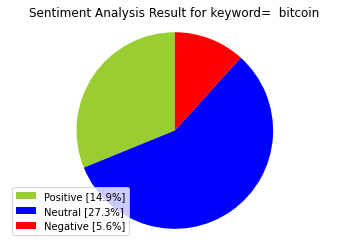

In [16]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [22]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


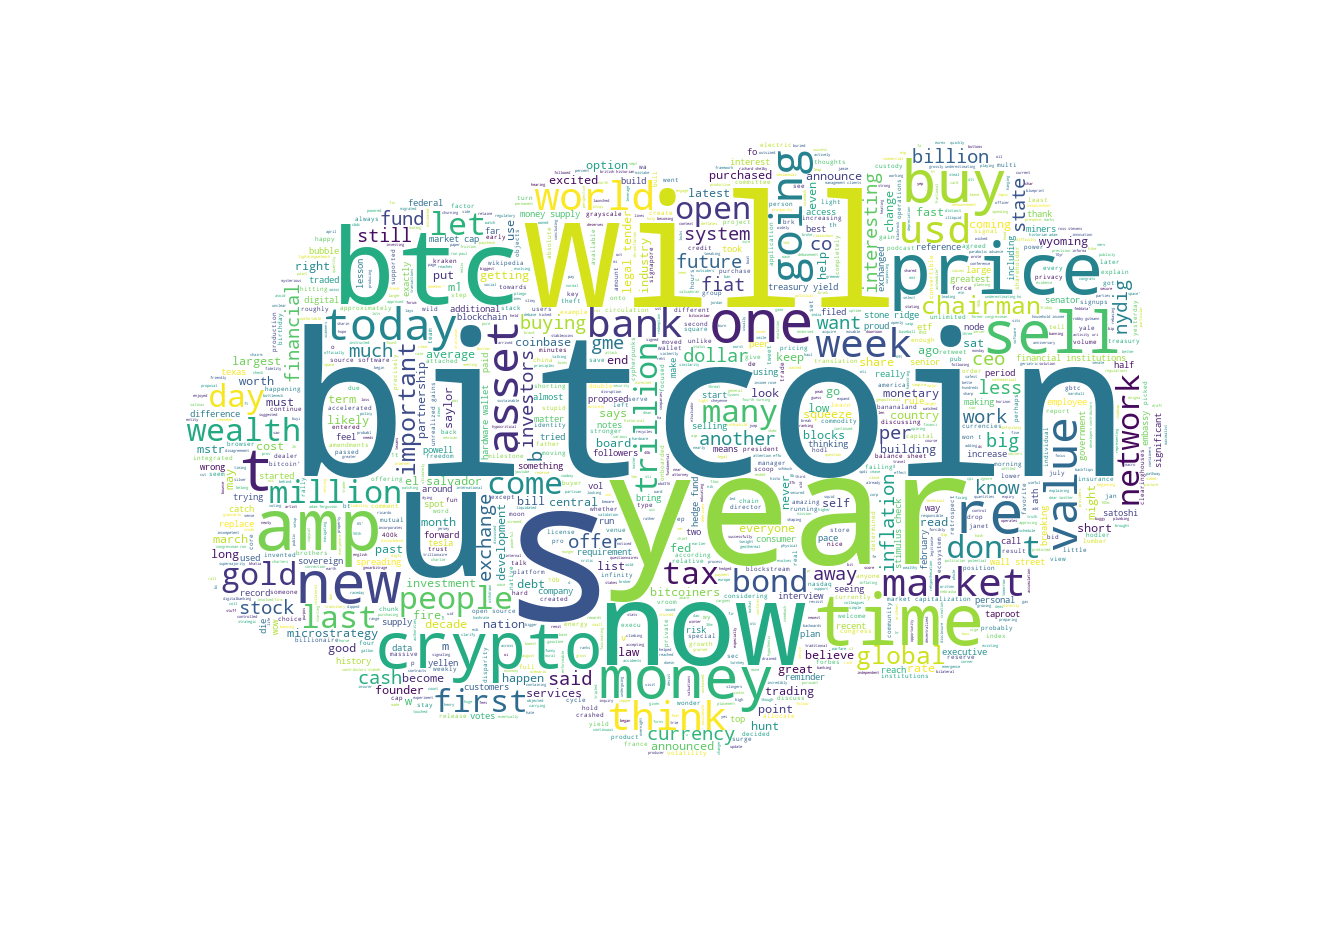

In [23]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

Word Cloud Saved Successfully


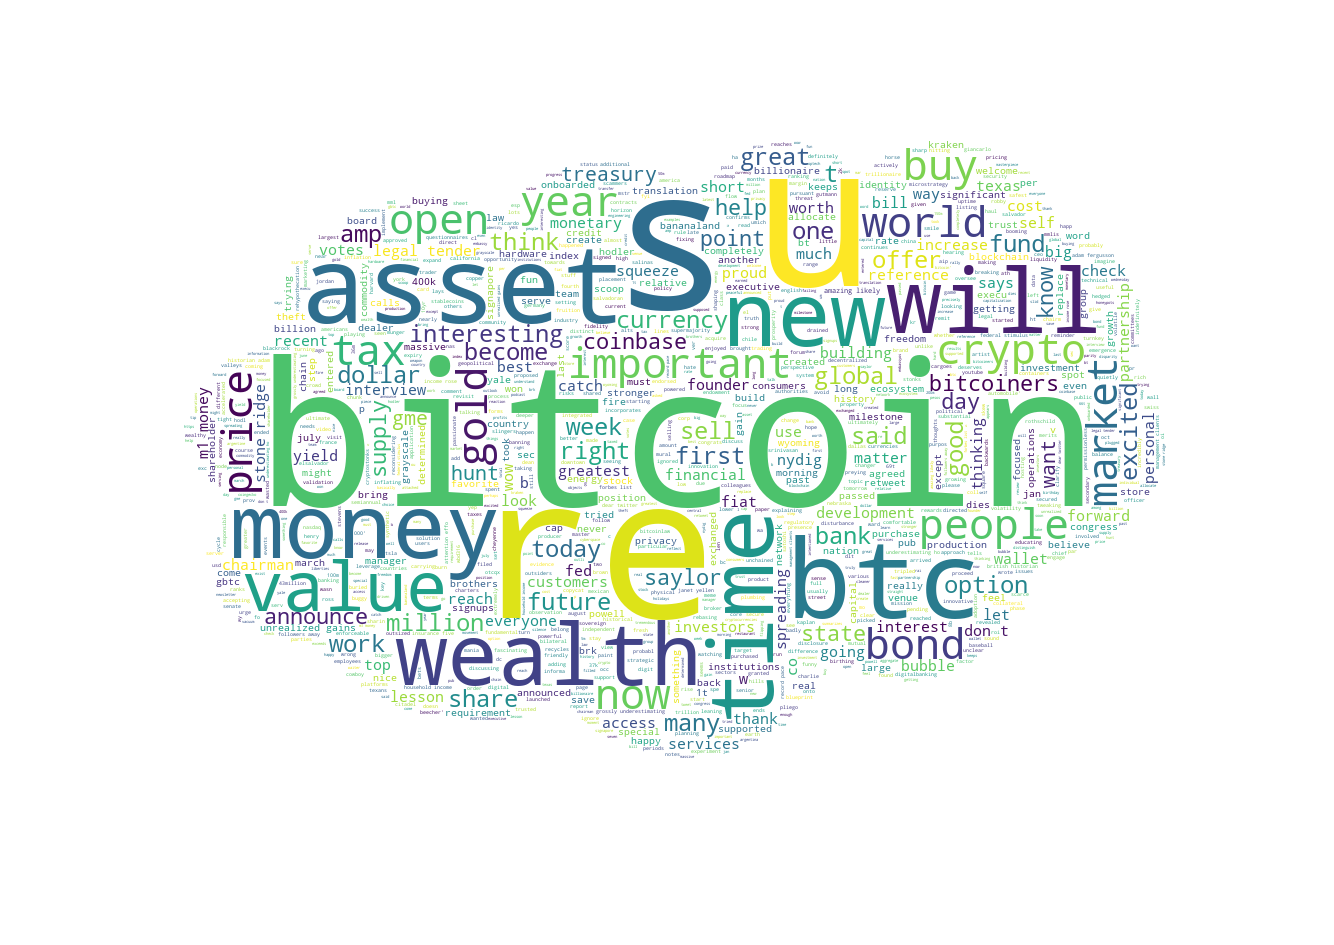

In [25]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


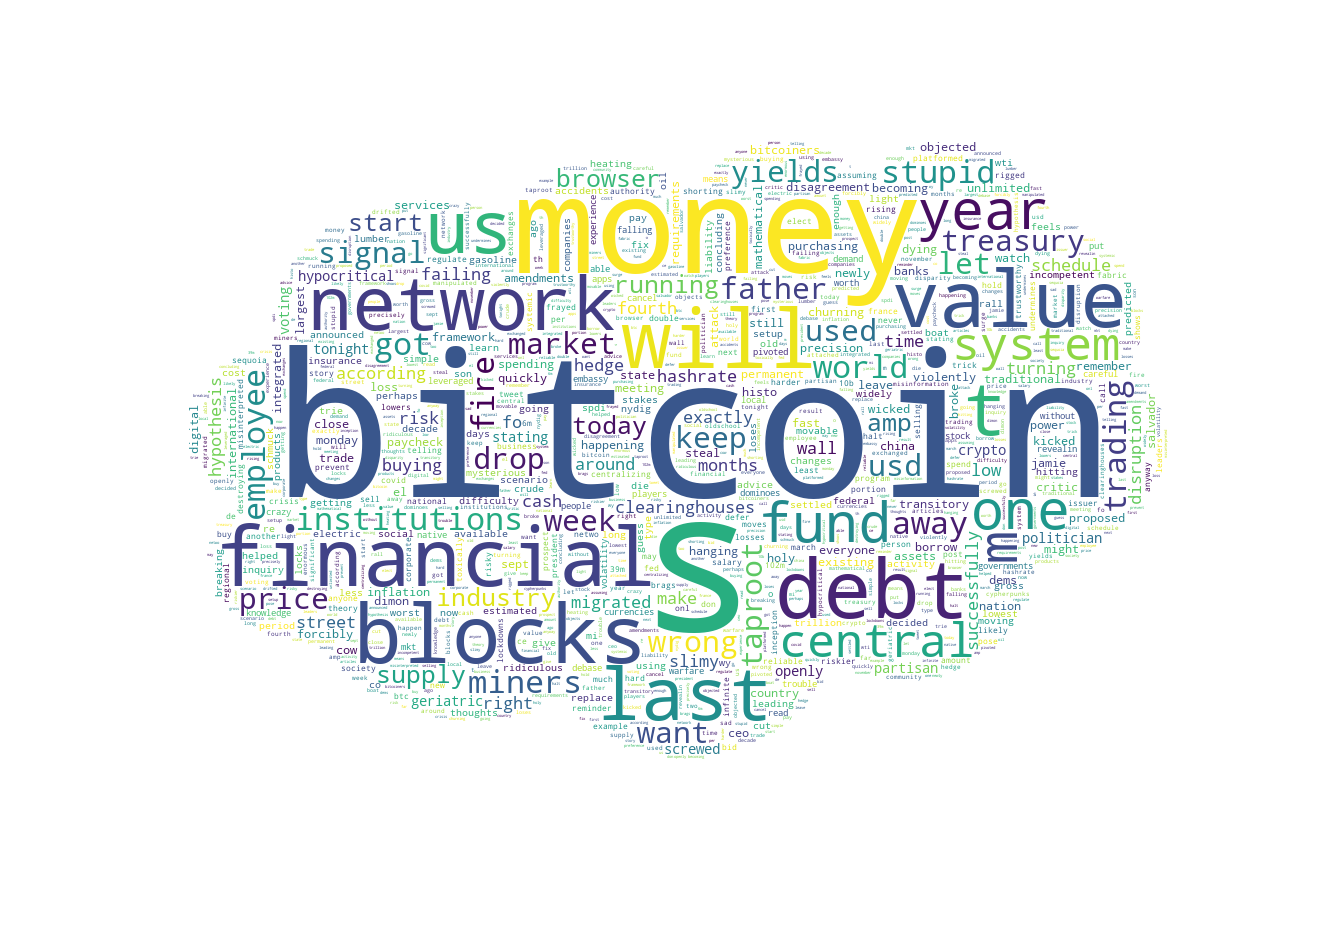

In [26]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


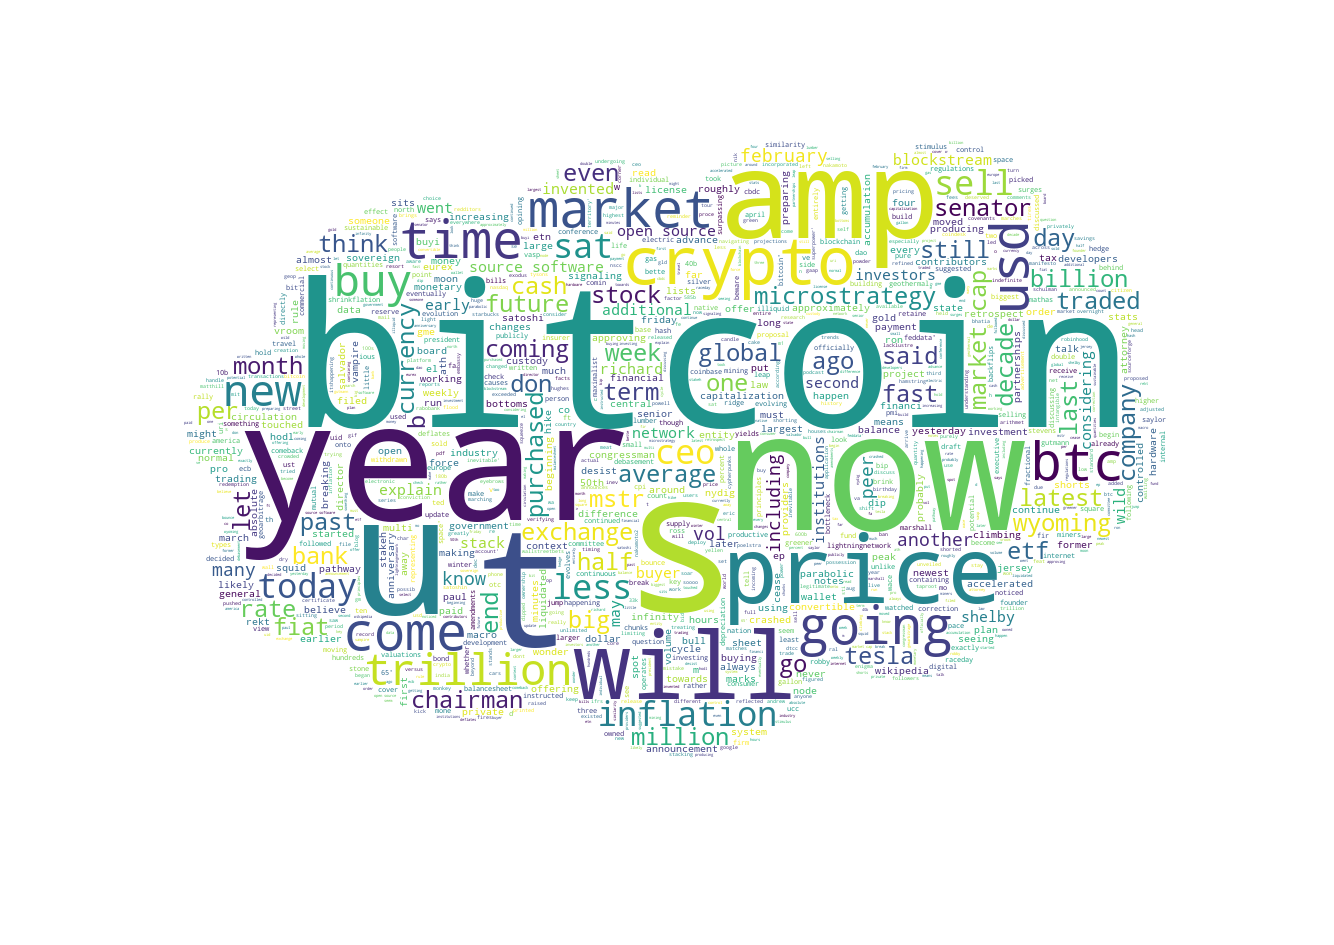

In [27]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [29]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [31]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,99.56
neutral,50.46
positive,103.42


In [32]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.62
neutral,8.59
positive,17.54


In [36]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [37]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [38]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [39]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [40]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [41]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Some #Bitcoin network stats. https://t.co/sUed...,some bitcoin network stats,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,30,4,some bitcoin network stats,"[some, bitcoin, network, stats, ]","[bitcoin, network, stats, ]","[bitcoin, network, stat, ]"
1,RT @DeribitExchange: The August $BTC option ex...,the august btc option expiry is shaping up t...,0.000000,0.500000,positive,0.0,0.875,0.125,0.4588,120,23,the august btc option expiry is shaping up t...,"[, the, august, btc, option, expiry, is, shapi...","[, august, btc, option, expiry, shaping, almos...","[, august, btc, option, expiri, shape, almost,..."
2,"RT @TIP_Network: Today, @PrestonPysh sits down...",today sits down with amp they talk ...,-0.155556,0.288889,neutral,0.0,1.000,0.000,0.0000,101,14,today sits down with amp they talk ...,"[, today, sits, down, with, amp, they, talk, a...","[, today, sits, amp, talk, blockstream, newest...","[, today, sit, amp, talk, blockstream, newest,..."
3,"RT @woonomic: In a macro cycle context, long t...",in a macro cycle context long term investors...,0.025000,0.350000,neutral,0.0,1.000,0.000,0.0000,126,19,in a macro cycle context long term investors...,"[, in, a, macro, cycle, context, long, term, i...","[, macro, cycle, context, long, term, investor...","[, macro, cycl, context, long, term, investor,..."
4,RT @michael_saylor: MicroStrategy has purchase...,microstrategy has purchased an additional 3 9...,-0.150000,0.400000,neutral,0.0,1.000,0.000,0.0000,120,21,microstrategy has purchased an additional b...,"[, microstrategy, has, purchased, an, addition...","[, microstrategy, purchased, additional, bitco...","[, microstrategi, purchas, addit, bitcoin, mil..."


In [43]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

478 Number of reviews has 1366 words


In [44]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,abl,absolut,acceler,accept,access,accid,accord,account,accumul,...,yale,ye,year,yellen,yep,yesterday,yield,york,youtub,yr
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
bitcoin,212
year,28
money,20
price,19
market,19
time,18
buy,18
btc,17
go,16
us,16


In [46]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [48]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('000 000', 8),
 ('000 bitcoin', 8),
 ('40 000', 6),
 ('buy bitcoin', 6),
 ('bitcoin network', 5),
 ('100 000', 5),
 ('legal tender', 4),
 ('el salvador', 4),
 ('38 000', 4),
 ('financial institutions', 4),
 ('money supply', 4),
 ('stone ridge', 4),
 ('50 000', 4),
 ('wall street', 4),
 ('market cap', 4),
 ('microstrategy purchased', 3),
 ('cash average', 3),
 ('average price', 3),
 ('bitcoin miners', 3),
 ('bitcoin legal', 3)]

In [49]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('cash average price', 3),
 ('bitcoin legal tender', 3),
 ('000 000 000', 3),
 ('m1 money supply', 3),
 ('open source software', 3),
 ('microstrategy purchased additional', 2),
 ('million cash average', 2),
 ('second half year', 2),
 ('half year going', 2),
 ('year going wild', 2),
 ('going wild bitcoin', 2),
 ('wild bitcoin went', 2),
 ('bitcoin went explain', 2),
 ('senator richard shelby', 2),
 ('richard shelby 75', 2),
 ('shelby 75 bitcoin', 2),
 ('75 bitcoin invented', 2),
 ('treasury yields drop', 2),
 ('btc building bitcoin', 2),
 ('building bitcoin ecosystem', 2)]